In [176]:
                                                    #Import Relavent Packages

#Essential
import os
import re

import pandas as pd
import numpy as np
import math
import cv2
from pathlib import Path
from importlib import reload


#Calculations
from sympy import symbols, diff
from pyloess import loess
from scipy.ndimage import median_filter, gaussian_filter1d
import scipy.signal as signal



#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


#Patty CSV Processing 
import solo_csv_cleaning_and_interpolation as clean
import solo_centroid_and_velocity_1 as calc
import solo_trajectory_visualizer as plot

import posture_processing as pp


In [177]:
                                                        #Set paths

#Set folder paths
path_to_folder = "C:\\Windows\\system32\\Cowbird\\"
path_plots = "C:\\Windows\\system32\\Cowbird\\Plots\\"
path_save = "C:\\Windows\\system32\\Cowbird\\Save\\"
path_vid_folder = "D:\\pythonworkspace\\"


#CSV Folders
path_csv_raw = "C:\\Windows\\system32\\Cowbird\\CSVs\\Raw\\"
path_csv_clean = "C:\\Windows\\system32\\Cowbird\\CSVs\\Clean\\"
path_csv_processed = "C:\\Windows\\system32\\Cowbird\\CSVs\\Processed\\"



                                            #Set important parameters

#Set list of all part names- MAKE SURE MATCHES CSV
parts_list = ['Head','Back','Wing_R','Shoulder_R','Trunk','Tail_R','Beak','Chest_L','Chest_R','Tail_L','Shoulder_L','Wing_L','Tail_Center']

#For plotting distance from midline
feature_list = ['Wing_R','Wing_L','Tail_R','Tail_L']
color_list = ['green','purple','blue','orange']
line_types = ['-','-','--','--']

kinematics_list = ['Trajectory','Velocity','Acceleration','Distance', 'Jerk']

want_coord_kin = False

In [178]:
                                            #Preprocess SlEAP CSV files 

for file in os.listdir(path_csv_raw):
    path_raw = path_csv_raw + file
    path_clean = path_csv_clean + file
    
    df_test = pd.read_csv(path_raw)
    
    #1. - Clean and interpolate raw csv files | Raw -> Clean  
    clean.interpolate_and_clean(path_raw,path_clean)
    
    #2. - Convert file paths to Path type
    Path_clean = Path(path_clean)
    Path_processed = Path(path_csv_processed)
    
    #Smooth and calculate centroids and velocities | Clean -> Processed
    calc.process_single_csv(Path_clean,Path_processed,parts_list, velocity_part = 'Head')

print('-------------------------------------------------------------------------------------------------------------------')

#3. - Create subfolders and dataframe with video information
df_files = pp.get_files(path_csv_processed, path_save, path_vid_folder)

#4. - Create image files of each frame if needed
pp.get_frames(df_files, need_frames = False)

print(f'Done processing {len(df_files)} CSV files from folder!')



✅ Wrote: C:\Windows\system32\Cowbird\CSVs\Clean\250525_YwOr_stim_control_rec11_video_top_0011.000_video_top_0011.analysis.csv (1199 rows)
Processing 1199 rows from 250525_YwOr_stim_control_rec11_video_top_0011.000_video_top_0011.analysis.csv
✅ Saved: 250525_YwOr_stim_control_rec11_video_top_0011.000_video_top_0011.analysis.csv (1199 rows) | Velocity from: Head
✅ Wrote: C:\Windows\system32\Cowbird\CSVs\Clean\250525_YwOr_stim_control_rec13_video_top_0003.000_video_top_0003.analysis.csv (1198 rows)
Processing 1198 rows from 250525_YwOr_stim_control_rec13_video_top_0003.000_video_top_0003.analysis.csv
✅ Saved: 250525_YwOr_stim_control_rec13_video_top_0003.000_video_top_0003.analysis.csv (1198 rows) | Velocity from: Head
✅ Wrote: C:\Windows\system32\Cowbird\CSVs\Clean\250525_YwOr_stim_control_rec13_video_top_0004.000_video_top_0004.analysis.csv (1198 rows)
Processing 1198 rows from 250525_YwOr_stim_control_rec13_video_top_0004.000_video_top_0004.analysis.csv
✅ Saved: 250525_YwOr_stim_contro

In [179]:
print(dict_WS.keys())
df_files

dict_keys(['Rec11-Song11', 'Rec13-Song03', 'Rec13-Song04', 'Rec13-Song05', 'Rec13-Song06', 'Rec13-Song07', 'Rec13-Song08', 'Rec13-Song09', 'Rec13-Song10', 'Rec13-Song11', 'Rec13-Song12', 'Rec13-Song13', 'Rec13-Song14', 'Rec13-Song15'])


,Date,Test,Rec_num,Song_num,File,Folder_path,Vid_file,Frame_path
0,250525,Control_MD,11,11,250525_YwOr_stim_control_rec11_video_top_0011.000_video_top_0011.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec11_Control_MD\Song_11\,D:\pythonworkspace\250525_YwOr_stim_control_rec11\video_top_0011.mp4,C:\Windows\system32\Cowbird\Save\250525\rec11_Control_MD\Song_11\Frames\
1,250525,Control_MD,13,03,250525_YwOr_stim_control_rec13_video_top_0003.000_video_top_0003.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_03\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0003.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_03\Frames\
2,250525,Control_MD,13,04,250525_YwOr_stim_control_rec13_video_top_0004.000_video_top_0004.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_04\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0004.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_04\Frames\
3,250525,Control_MD,13,05,250525_YwOr_stim_control_rec13_video_top_0005.000_video_top_0005.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_05\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0005.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_05\Frames\
4,250525,Control_MD,13,06,250525_YwOr_stim_control_rec13_video_top_0006.000_video_top_0006.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_06\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0006.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_06\Frames\
5,250525,Control_MD,13,07,250525_YwOr_stim_control_rec13_video_top_0007.000_video_top_0007.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_07\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0007.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_07\Frames\
6,250525,Control_MD,13,08,250525_YwOr_stim_control_rec13_video_top_0008.000_video_top_0008.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_08\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0008.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_08\Frames\
7,250525,Control_MD,13,09,250525_YwOr_stim_control_rec13_video_top_0009.000_video_top_0009.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_09\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0009.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_09\Frames\
8,250525,Control_MD,13,10,250525_YwOr_stim_control_rec13_video_top_0010.000_video_top_0010.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_10\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0010.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_10\Frames\
9,250525,Control_MD,13,11,250525_YwOr_stim_control_rec13_video_top_0011.000_video_top_0011.analysis.csv,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_11\,D:\pythonworkspace\250525_YwOr_stim_control_rec13\video_top_0011.mp4,C:\Windows\system32\Cowbird\Save\250525\rec13_Control_MD\Song_11\Frames\


In [182]:
os.path.exists(save_path)

True

In [180]:
                                        #Loop through files - Calc and plot!  
reload(pp)
dict_WS = {}
dict_df = {}

wings = ['Left','Right','Avg']

for ind, row in df_files.iterrows():
    file = row['File']
    filepath = f'{path_csv_processed}{file}'
    save_path = f'{row['Folder_path']}'
    rec = row['Rec_num']
    song = row['Song_num']
    vid_name = f'rec{rec}-song{song}'

    
    #if you want a specific file put an if statement right here! 
    #if rec == '13':
    print(f'Processing Rec{rec} - Song {song}')

                                                #Extract Kinematics   
    #Extracts coordinates from cleaned csv file 
    df_raw, df_smooth = pp.extract_coords(filepath,parts_list, MEDIAN_WINDOW = 120, GAUSSIAN_WINDOW = 60, GAUSSIAN_SIGMA = 10 )
    
    #Calculate and filter distance from midline
    df_raw_dist, df_dist_filtered = pp.distance_from_midline(df_raw,save_path)
    df_dist = df_dist_filtered
    
    #Plot distances from midline 
    pp.plot_distances(df_dist, save_path,vid_name, want_time=True, want_combo = True, show_plot = False)
    
    #Calculate kinematics relative to wingspread
    df_WS_kin = pp.calc_WS_kinematics(df_dist)
    
    #Plot wingspread_kinematics
    pp.plot_WS_kinematics(df_WS_kin, save_path, vid_name, show_plot = False)


    dict_temp = {}

    for word in wings:
        #Get averages for both wings
        df_WS_avg = pp.WS_avg(df_dist, df_WS_kin,  wing = word)
        
        #Get stats on wingspread
        dict_WS_stats = pp.WS_stats(df_WS_avg, wing = word)
        peak_WS = dict_WS_stats['Peak_WS']['Peak_value']

        dict_pumps, peaks, troughs = pp.find_pumps(df_WS_avg, wing = word, want_peaks = True)

        dict_temp[f'{word}'] = {'WS_Stats': dict_WS_stats, 'Pump_Stats': dict_pumps, 'df_WS': df_WS_avg}
        
    dict_WS[f'Rec{rec}-Song{song}'] = dict_temp
    dict_df[f'Rec{rec}-Song{song}'] = {'WS':df_dist, 'WS_kin':df_WS_kin}

    if want_coord_kin:
            #Calculate kinematics from coordinates
        df_kin = pp.calc_kinematics(df_smooth)
    
        #Plot and save kinematic plots from coordinates
        pp.plot_kinematics(df_kin,df_smooth,save_path,vid_name, show_plot = False)


    print(f'Rec{rec} - Song {song} Done!')
    print('---------------------------------------------------------------------------------------------------------------')


#Correct onsets 
dict_WS = pp.find_timings(dict_WS)

#All songs averages for WS
df_avg_WS = pp.song_averages

#Make combined features plots
pp.combo_plots(dict_WS, df_files)


Processing Rec11 - Song 11
Coordinates Extracted!
Distance Plots Made!
Kinematic Plots Made!
Rec11 - Song 11 Done!
---------------------------------------------------------------------------------------------------------------
Processing Rec13 - Song 03
Coordinates Extracted!
Distance Plots Made!
Kinematic Plots Made!
Rec13 - Song 03 Done!
---------------------------------------------------------------------------------------------------------------
Processing Rec13 - Song 04
Coordinates Extracted!
Distance Plots Made!
Kinematic Plots Made!
Rec13 - Song 04 Done!
---------------------------------------------------------------------------------------------------------------
Processing Rec13 - Song 05
Coordinates Extracted!
Distance Plots Made!
Kinematic Plots Made!
Rec13 - Song 05 Done!
---------------------------------------------------------------------------------------------------------------
Processing Rec13 - Song 06
Coordinates Extracted!
Distance Plots Made!
Kinematic Plots Made!

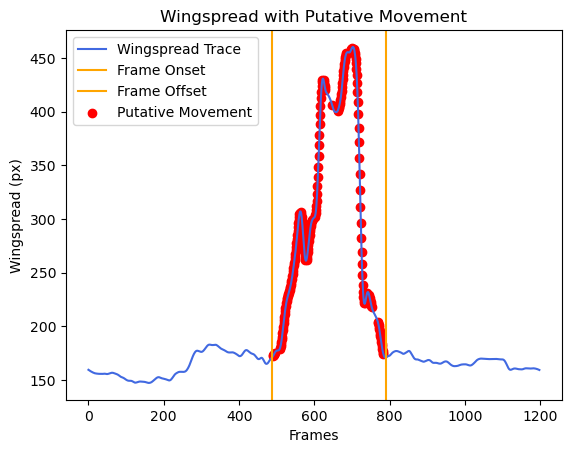

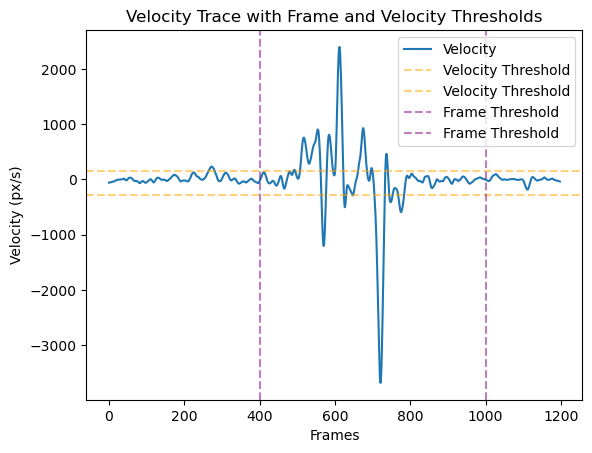

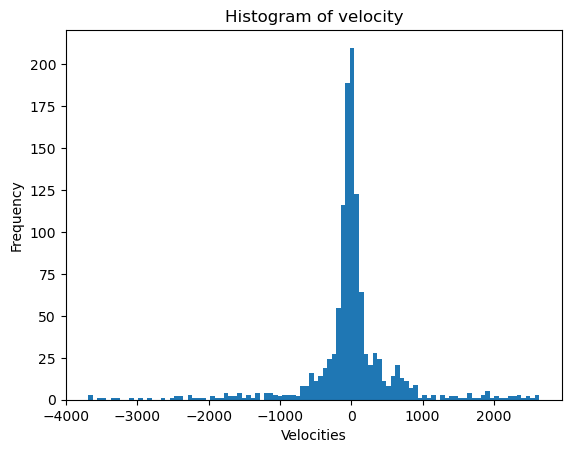

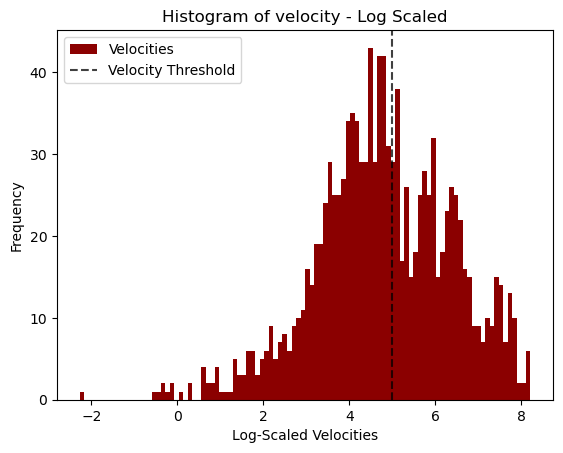

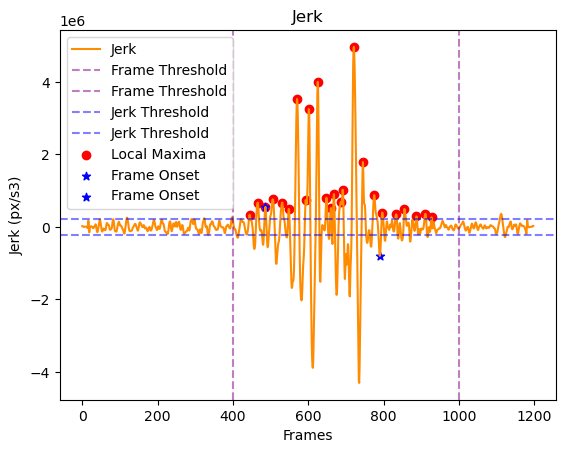

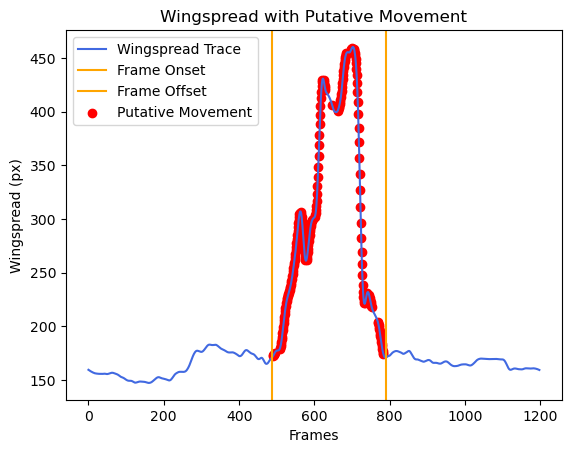

In [173]:
#Velocity Histogram
v_list = []
inv_v_list = []
j_list = []

#Set the trough of the bimodal distribution as the velocity threshold
v_thresh = np.exp(5)  #Make sure to convert back to actual velocity 
neg_v_thresh = -np.exp(5.67)



for wing in wings:

    if 'Avg' not in wing:
        average_trace = []
        disp_list = []
        j_avg = []
        for key in dict_WS.keys():
        
            if '04' in key:
                time = dict_WS[key][wing]['df_WS'][f'Time']
                d = dict_WS[key][wing]['df_WS'][f'WS_{wing}']
                j = dict_WS[key][wing]['df_WS'][f'Jerk_{wing}']
                v = (dict_WS[key][wing]['df_WS'][f'Velocity_{wing}'])
                j_cut = dict_WS[key][wing]['df_WS'][f'Jerk_{wing}'][900:]
                v_cut = v[400:1000]
                v_neg = v[v <= 0][400:1000]
                v_list.extend(v_cut)
                inv_v_list.extend(v_neg)
                j_list.extend(j_cut)

log_v_list = np.log(np.abs(v_list)) #Take the log of the absolute value of the list to normalize

#Putative movement
#If the velocity is above the velcotiy threshold label point red 
new_d = d[(v >= v_thresh) | (v <= neg_v_thresh)].to_numpy()
idx_d = d[(v >= v_thresh) | (v <= neg_v_thresh)].index.to_numpy()

#Make it within the range of thre frame threshold 
new_d = new_d[(idx_d >= 420) & (idx_d <= 1000)]
idx_d = idx_d[(idx_d >= 420) & (idx_d <= 1000)]


#Find the first point where the velocity is positive
putative_onset = np.min(idx_d[v[idx_d] >= 0])
putative_offset = np.max(idx_d[v[idx_d] <= 0])



frame_thresh_on = 400 #Only look for crossing v_thresh after this frame 
frame_thresh_off =1000



                                                #Finidng Onset through Jerk

#Set the Jerk threshold to 3x the standard deviation 
j_thresh = np.nanstd(j_list)*2
neg_j_thresh = -np.nanstd(j_list)*2


#Find local jerk maxima
j_maxima,props = signal.find_peaks(j, height = [j_thresh,np.max(j)])
j_maxima = j_maxima[(j[j_maxima] >= j_thresh) & (j_maxima >= frame_thresh_on) & (j_maxima <=frame_thresh_off)] #Filter maxima to be within frame thresholds and above jerk threshold (optional)

#Find distances between jerk maxima frame and putative movement onset 
distances = np.abs(j_maxima - putative_onset)
min_index = np.where(distances == np.min(distances)) #Find the smallest distance 
frame_onset = j_maxima[min_index][0] #The smallest distance is onset of movement


neg_j_thresh = -np.nanstd(j_list)*2

neg_j_maxima,props = signal.find_peaks(-j, height = [j_thresh,np.max(-j)])
neg_j_maxima = neg_j_maxima[(j[neg_j_maxima] <= neg_j_thresh) & (neg_j_maxima >= frame_thresh_on) & (neg_j_maxima <=frame_thresh_off)] #Filter maxima to be within frame thresholds and above jerk threshold (optional)

distances = np.abs(neg_j_maxima - putative_offset)
min_index = np.where(distances == np.min(distances)) #Find the smallest distance 
frame_offset = neg_j_maxima[min_index][0] #The smallest distance is onset of movement


#--------------------------------------------------------------------------------------------------------------------------------
                              


#Plot Wingspread and color all points above threshold
plt.plot(range(len(d)), d, color = 'royalblue', label = 'Wingspread Trace')
plt.axvline(x=frame_onset, color = 'orange', label = 'Frame Onset')
plt.axvline(x=frame_offset, color = 'orange', label = 'Frame Offset')

plt.scatter(idx_d, new_d, color = 'red', label = 'Putative Movement') #Plot putative movement

plt.title('Wingspread with Putative Movement')
plt.xlabel('Frames')
plt.ylabel('Wingspread (px)')
plt.legend()
plt.show()
plt.close()


#--------------------------------------------------------------------------------------------------------------------------------



#Plot velocity with the thrshold to visualize
plt.plot(range(len(v)), v, label = 'Velocity')
plt.axhline(y=v_thresh, color = 'orange', linestyle = '--', label = 'Velocity Threshold', alpha = 0.5)
plt.axhline(y=neg_v_thresh, color = 'orange', linestyle = '--', label = 'Velocity Threshold', alpha = 0.5)
plt.axvline(x= frame_thresh_on, color = 'purple', linestyle = '--',label = 'Frame Threshold', alpha = 0.5) #Set frame threshold to 440 
plt.axvline(x= frame_thresh_off, color = 'purple', linestyle = '--',label = 'Frame Threshold', alpha = 0.5) #Plot frame threshold


plt.title('Velocity Trace with Frame and Velocity Thresholds')
plt.xlabel('Frames')
plt.ylabel('Velocity (px/s)')
plt.legend()
plt.show()
plt.close()


#--------------------------------------------------------------------------------------------------------------------------------


                                        #Making Histograms to find putative movement

#In order to see a bimodal distribution I have to filter out some of the beginning silent period and log scale the velocities 
counts,bins, patches = plt.hist(v_list,bins = 100) #Plot histogram of all velocities

plt.title('Histogram of velocity')
plt.xlabel('Velocities')
plt.ylabel('Frequency')
plt.show()
plt.close()
#plt.xlim(0,1500)
#plt.ylim(0,1000)


#Plot log_scaled velocities
counts,bins, patches = plt.hist(log_v_list,bins = 100, label = 'Velocities',color = 'darkred') 
plt.axvline( x = 5, color = 'black', linestyle = '--', label = 'Velocity Threshold',alpha = 0.75) #4.8 seems to be the trough between bimodal distribution

plt.title('Histogram of velocity - Log Scaled')
plt.xlabel('Log-Scaled Velocities')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.close()


#Set the trough of the bimodal distribution as the velocity threshold
v_thresh = np.exp(5)  #Make sure to convert back to actual velocity 


#--------------------------------------------------------------------------------------------------------------------------------

                                                #Finidng Onset through Jerk

#Plot jerk
plt.plot(range(len(j)),j,color = 'darkorange', label = 'Jerk')
plt.axvline(x= frame_thresh_on, color = 'purple', linestyle = '--',label = 'Frame Threshold', alpha = 0.5) #Plot frame threshold
plt.axvline(x= frame_thresh_off, color = 'purple', linestyle = '--',label = 'Frame Threshold', alpha = 0.5) #Plot frame threshold
plt.axhline(y= j_thresh, color = 'blue', linestyle = '--',label = 'Jerk Threshold', alpha = 0.5) #Plot jerk threshold 
plt.axhline(y= -j_thresh, color = 'blue', linestyle = '--',label = 'Jerk Threshold', alpha = 0.5) #Plot jerk threshold 


plt.scatter(j_maxima, j[j_maxima], color = 'red', label = 'Local Maxima') #Plot jerk maxima 
plt.scatter(frame_onset, j[frame_onset], color = 'Blue', marker = '*',label = 'Frame Onset') #Plot jerk maxima 
plt.scatter(frame_offset, j[frame_offset], color = 'blue', marker = '*',label = 'Frame Onset') #Plot jerk maxima 


plt.title('Jerk')
plt.xlabel('Frames')
plt.ylabel('Jerk (px/s3)')
plt.legend()
plt.show()
plt.close()


#--------------------------------------------------------------------------------------------------------------------------------




#--------------------------------------------------------------------------------------------------------------------------------


#Plot Wingspread and color all points above threshold
plt.plot(range(len(d)), d, color = 'royalblue', label = 'Wingspread Trace')
plt.axvline(x=frame_onset, color = 'orange', label = 'Frame Onset')
plt.axvline(x=frame_offset, color = 'orange', label = 'Frame Offset')

plt.scatter(idx_d, new_d, color = 'red', label = 'Putative Movement') #Plot putative movement

plt.title('Wingspread with Putative Movement')
plt.xlabel('Frames')
plt.ylabel('Wingspread (px)')
plt.legend()
plt.show()
plt.close()





#Note - to calculate the threshold for putative wingspread I did the following: 
#  1. Create aggregate list of all velocities (each wing excluding the average of both wings). Indexed all velocities from frame 400 to frame 1000 to make the amount of still periods and movement periods about equal
#  2. Created a histogram of all velocities (from all videos and wings excluding the average of both wings) and a log-scaled histogram
#  3. From the log-scaled histogram, there should be a bimodal distribution. Find the x_value of trough of the distribution
#  4. Put the trough of the bimodal distribution to the power of e. - this is the velocity threshold
#  5. Set a frame threshold - near the start of wingspread 
#  6. Find the local maxima of the jerk, above the jerk threshold and within frame threshold 
#  7. Find the local maximum closest to the start of putative movement where the velocity is positive - this is WS onset

#Offset
# I did the reverse of everything I did for the onset. Because positive and negative velocities are asymmetrical you need to have different thresholds for positive negative velocities. 
# Created a histogram and log-scaled histograms of just the negative velocities and made a separate threshold based on that
# Found the local maxima of the inverse jerk values and set a threshold of 2x below the standard deviation of baseline jerk
# find the local macimum closest to putative offset of WS where the velocity is negative and close to 0 this is WS offset
#  8. WS offset is the last index of putative movement - bc jerk usually comes first so can't use it

In [490]:
                                        #Troubleshooting

#Show specific frame
desired_frame = 832
song = 8
recording = 13
date = 250525

#pp.show_frame(df_files, desired_frame, date, recording, song)

#Make video clip
#pp.check_vid(400,800,df_files['Frame_path'][0],path_plots)

- Find peak wingspread

- Look at distance between wing tips and back 
- Load in pictures for each frame from video

- Might want to play around with calculating velocity outside of Patty's script so I can get multiple ones

- Create a midline axis and plot wing distance and coordinates from the axis

- Conditional plotting threshold of distance to the trunk

- Distance threshold from trunk to consider folded or not folded
- canlook at how much time wing extended or closed, can look at avg velocity and acceleration during open and closed states
- or use wing-wing distance threshold 

- Measure wing spans to compute average for males

- find way to compute length

- Maybe make a distance function in a script

- Should I use moving window to make velocity plots less noisy?

In [ ]:
#Animate - make into function later
colors = ['green','red','black','blue','purple','orange','yellow','pink','brown','cyan','maroon','darkgreen','slategray']

edges = [
    ("Beak", "Head"),
    ("Head", "Back"),
    ("Head", "Chest_R"),
    ("Head", "Chest_L"),
    ("Back", "Trunk"),
    ("Back", "Shoulder_R"),
    ("Back", "Shoulder_L"),
    ("Back", "Wing_R"),
    ("Back", "Wing_L"),
    ("Trunk", "Tail_R"),
    ("Trunk", "Tail_L"),
    ("Trunk", "Tail_Center"),
]
# Video writer setup
output_path = f"{path_plots}skeleton_video.mp4"
fps = 30
frame_size = (1920, 1080)  # match your plot limits

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)

for n in range(0, len(df_coords), 1):
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)  # ensures 1920x1080

    # Plot body parts
    for i, part in enumerate(parts_list):
        ax.scatter(df_coords[f"{part}.x"].iloc[n],
                   df_coords[f"{part}.y"].iloc[n],
                   color=colors[i], s=5)

    # Plot edges
    for p1, p2 in edges:
        ax.plot([df_coords[f"{p1}.x"].iloc[n], df_coords[f"{p2}.x"].iloc[n]],
                [df_coords[f"{p1}.y"].iloc[n], df_coords[f"{p2}.y"].iloc[n]],
                color="k", linewidth=0.5)

    ax.set_xlim(0, 1920)
    ax.set_ylim(0, 1080)
    ax.invert_yaxis()  # flip so origin is top-left like video frames
    ax.set_title(f"Skeleton at frame {n}")
    ax.axis("off")     # remove axes for clean video

    # Convert plot to image buffer
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)

    # Write frame
    out.write(cv2.resize(img_bgr, frame_size))

    plt.close(fig)

out.release()
print(f"Video saved to {output_path}")
